In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [16]:
data=pd.read_csv("data/FastagFraudDetection.csv")

In [17]:
data.shape

(5000, 13)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [19]:
data.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [20]:
data.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [21]:
data.duplicated().sum()

np.int64(0)

In [22]:
data.sample(4)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
2270,2271,4/2/2023 10:30,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",70,MH80MN5678,Not Fraud
4297,4298,6/15/2023 2:10,Sedan,FTG-287-HGT-169,A-101,Regular,Medium,110,110,"12.936687032945434, 77.53113977439017",59,GA90MN0123,Not Fraud
4282,4283,10/6/2023 10:53,Van,FTG-086-STU-666,B-102,Express,Medium,120,90,"12.936687032945434, 77.53113977439017",50,GA78IJ2345,Fraud
2229,2230,2/17/2023 14:15,Truck,FTG-189-QAZ-543,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",94,AP67IJ7890,Not Fraud


Observations

1. fastag has null values of 549
2. There are 4 numerical columns and other are categorical.
3. No duplicated values.

In [23]:
cat_columns=data.select_dtypes(include=['object'])
num_columns=data.select_dtypes(include=['int64','float64'])

In [24]:
cat_columns.columns

Index(['Timestamp', 'Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type',
       'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number',
       'Fraud_indicator'],
      dtype='object')

In [25]:

# uniqiue values
print(cat_columns['Vehicle_Type'].unique())
print(len(cat_columns['FastagID'].unique()))
print(cat_columns['TollBoothID'].unique())
print(cat_columns['Lane_Type'].unique())
print(cat_columns['Vehicle_Dimensions'].unique())
print(cat_columns['Geographical_Location'].unique())

['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
4452
['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
['Express' 'Regular']
['Large' 'Small' 'Medium']
['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


In [26]:
cat_columns.head(4)

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
0,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,"13.059816123454882, 77.77068662374292",KA11AB1234,Fraud
1,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,"13.059816123454882, 77.77068662374292",KA66CD5678,Fraud
2,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,"13.059816123454882, 77.77068662374292",KA88EF9012,Not Fraud
3,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,"13.059816123454882, 77.77068662374292",KA11GH3456,Fraud


Data Visualisation

In [27]:
cat_columns['Fraud_indicator'].value_counts()

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64
([<matplotlib.patches.Wedge object at 0x0000025694BDBCE0>, <matplotlib.patches.Wedge object at 0x000002569474B170>], [Text(-0.694932090290147, -0.9782992333049061, 'Not Fraud'), Text(0.6370212181751125, 0.8967742010086462, 'Fraud')], [Text(-0.4053770526692524, -0.5706745527611952, '80.34%'), Text(0.3474661190046068, 0.48914956418653427, '19.66%')])


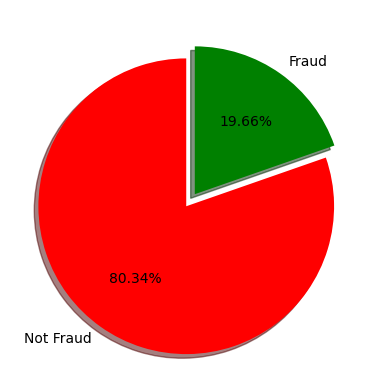

In [33]:
# analyzing frauds
print(cat_columns['Fraud_indicator'].value_counts())
print(plt.pie(cat_columns['Fraud_indicator'].value_counts(),
        autopct='%0.2f%%',
        labels=cat_columns['Fraud_indicator'].value_counts().index,
        colors=['red', 'green'],
        startangle=90,
        explode=(0.1, 0),  # Optional: highlight one segment (e.g., Fraud)
        shadow=True))


plt.show()

Axes(0.125,0.11;0.775x0.77)


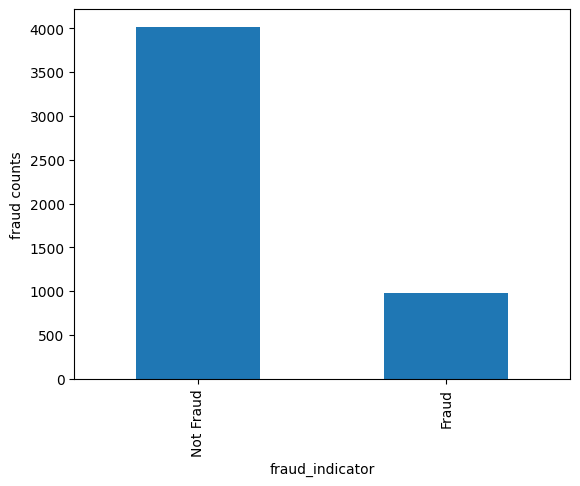

In [29]:
print(cat_columns['Fraud_indicator'].value_counts().plot(kind='bar',
                                                   xlabel='fraud_indicator',
                                                   ylabel='fraud counts',
                                                   align='center'))

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: count, dtype: int64


<Axes: ylabel='count'>

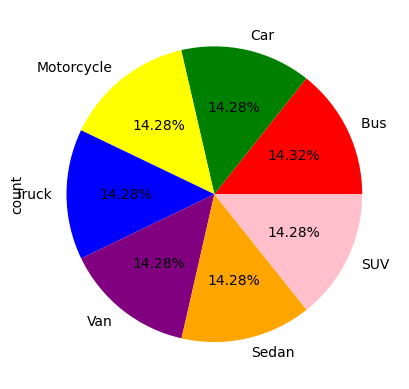

In [30]:
# analyzing types of vehicles
print(cat_columns['Vehicle_Type'].value_counts())
cat_columns['Vehicle_Type'].value_counts().plot(kind='pie', labels=cat_columns['Vehicle_Type'].value_counts().index,
                                                   autopct='%0.2f%%',
                                                   colors=['red','green','yellow','blue','purple','orange','pink'])

<Axes: xlabel='Vehicle_Type', ylabel='Vehicle_Type counts'>

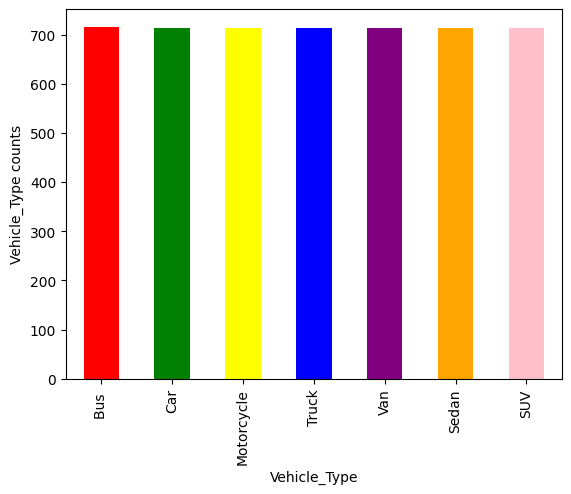

In [34]:
cat_columns['Vehicle_Type'].value_counts().plot(kind='bar',
                                                   xlabel='Vehicle_Type',
                                                   ylabel='Vehicle_Type counts',
                                                   align='center',
                                                color=['red','green','yellow','blue','purple','orange','pink'])

<Axes: xlabel='Vehicle_Type', ylabel='count'>

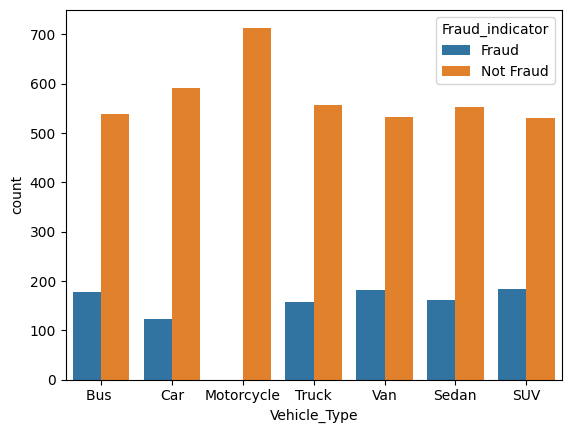

In [35]:
sns.countplot(data=cat_columns,x='Vehicle_Type',hue='Fraud_indicator')

TollBoothID
B-102    1432
A-101    1428
C-103    1426
D-106     570
D-105     104
D-104      40
Name: count, dtype: int64


<Axes: ylabel='count'>

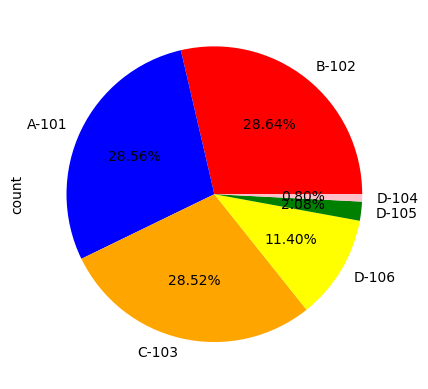

In [36]:
# analyzing tollboothId
print(cat_columns['TollBoothID'].value_counts())
cat_columns['TollBoothID'].value_counts().plot(kind='pie', labels=cat_columns['TollBoothID'].value_counts().index,
                                                   autopct='%0.2f%%',
                                               colors=['red','blue','orange','yellow','green','pink'])

<Axes: xlabel='TollBoothID', ylabel='TollBoothID counts'>

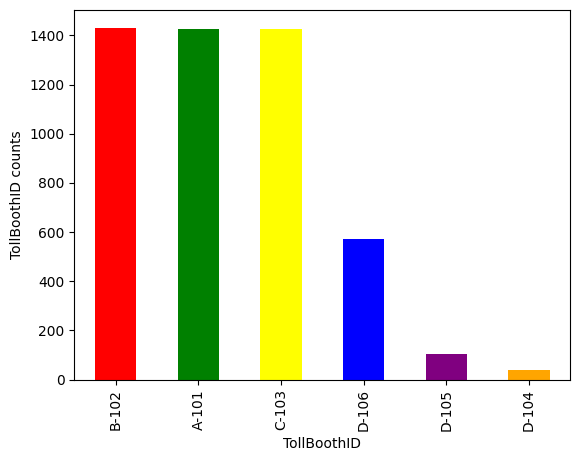

In [37]:
cat_columns['TollBoothID'].value_counts().plot(kind='bar',
                                                   xlabel='TollBoothID',
                                                   ylabel='TollBoothID counts',
                                                   align='center',
                                               color=['red','green','yellow','blue','purple','orange','pink'])

<Axes: xlabel='TollBoothID', ylabel='count'>

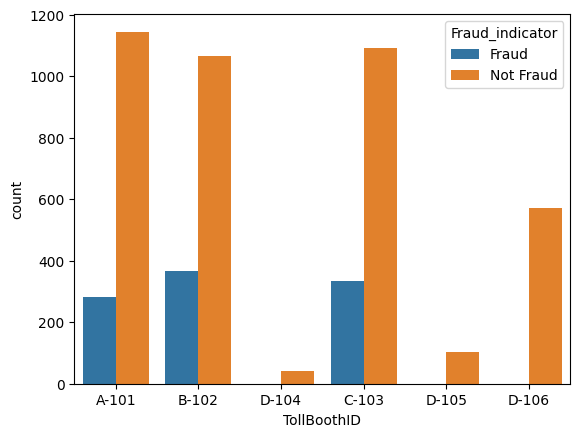

In [38]:
sns.countplot(data=cat_columns,x='TollBoothID',hue='Fraud_indicator')

Lane_Type
Regular    2858
Express    2142
Name: count, dtype: int64


<Axes: ylabel='count'>

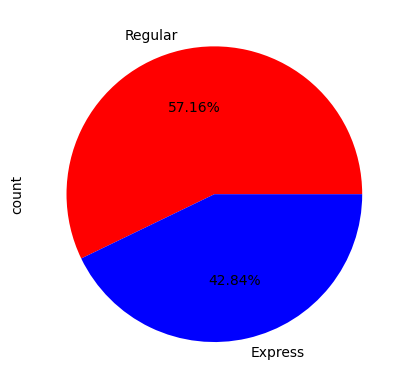

In [39]:
# analyzing lane types
print(cat_columns['Lane_Type'].value_counts())
cat_columns['Lane_Type'].value_counts().plot(kind='pie', labels=cat_columns['Lane_Type'].value_counts().index,
                                                   autopct='%0.2f%%',
                                               colors=['red','blue'])

<Axes: xlabel='Lane_Type', ylabel='Lane_Type counts'>

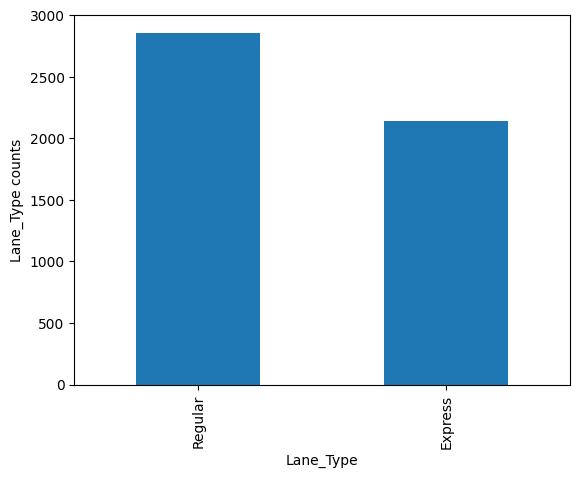

In [40]:
cat_columns['Lane_Type'].value_counts().plot(kind='bar',
                                                   xlabel='Lane_Type',
                                                   ylabel='Lane_Type counts',
                                                   align='center')

<Axes: xlabel='Lane_Type', ylabel='count'>

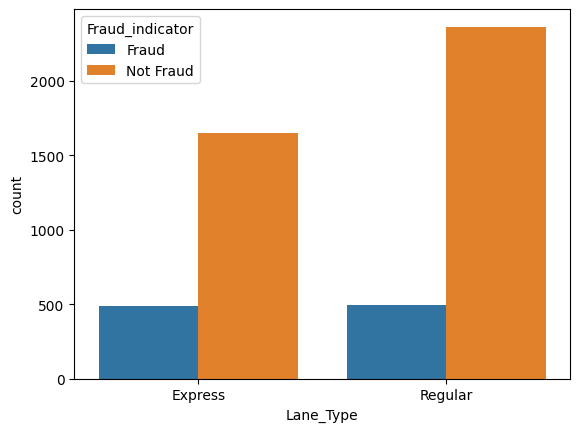

In [41]:
sns.countplot(data=cat_columns,x='Lane_Type',hue='Fraud_indicator')

Vehicle_Dimensions
Large     2144
Small     1428
Medium    1428
Name: count, dtype: int64


<Axes: ylabel='count'>

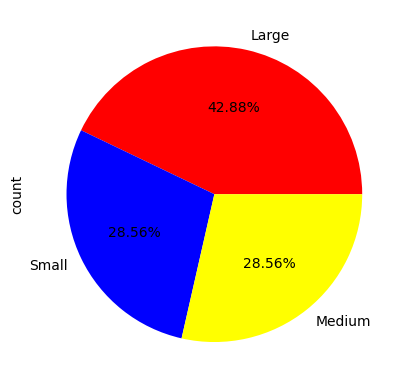

In [42]:
# anlyzing vehiclwe dimensions
print(cat_columns['Vehicle_Dimensions'].value_counts())
cat_columns['Vehicle_Dimensions'].value_counts().plot(kind='pie', labels=cat_columns['Vehicle_Dimensions'].value_counts().index,
                                                   autopct='%0.2f%%',
                                                      colors=['red','blue','yellow'])

<Axes: xlabel='Vehicle_Dimensions', ylabel='Vehicle_Dimensions counts'>

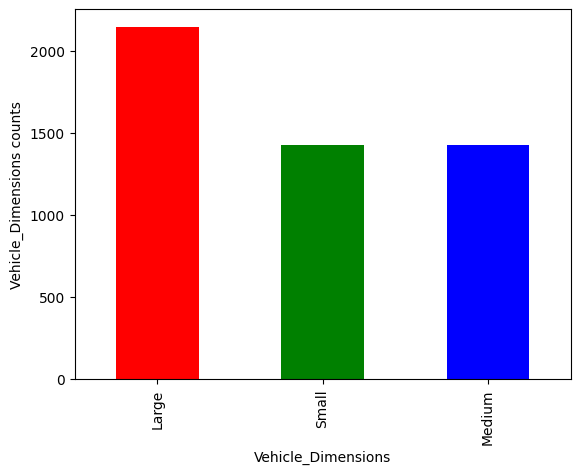

In [43]:
cat_columns['Vehicle_Dimensions'].value_counts().plot(kind='bar',
                                                   xlabel='Vehicle_Dimensions',
                                                   ylabel='Vehicle_Dimensions counts',
                                                   align='center',
                                                      color=['red','green','blue'])

<Axes: xlabel='Vehicle_Dimensions', ylabel='count'>

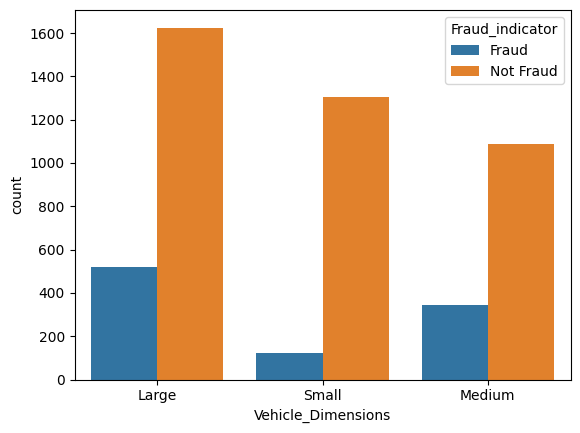

In [44]:
sns.countplot(data=cat_columns,x='Vehicle_Dimensions',hue='Fraud_indicator')

Geographical_Location
13.059816123454882, 77.77068662374292    1000
13.042660878688794, 77.47580097259879    1000
12.84197701525119, 77.67547528176169     1000
12.936687032945434, 77.53113977439017    1000
13.21331620748757, 77.55413526894684     1000
Name: count, dtype: int64


<Axes: ylabel='count'>

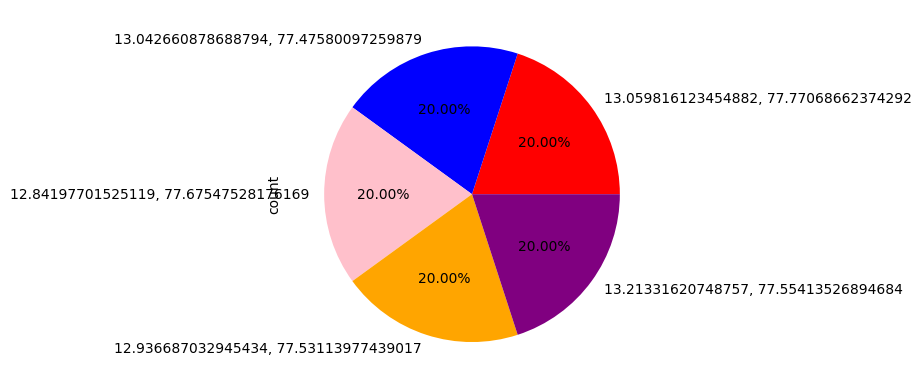

In [45]:
# analyzing geographical locations
print(cat_columns['Geographical_Location'].value_counts())
cat_columns['Geographical_Location'].value_counts().plot(kind='pie', labels=cat_columns['Geographical_Location'].value_counts().index,
                                                   autopct='%0.2f%%',
                                                         colors=['red','blue','pink','orange','purple'])

<Axes: xlabel='Geographical_Location', ylabel='Geographical_Location counts'>

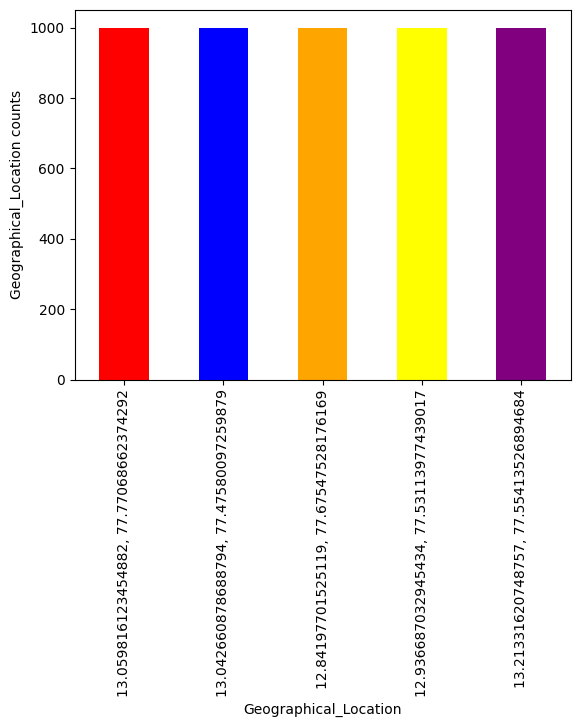

In [46]:
cat_columns['Geographical_Location'].value_counts().plot(kind='bar',
                                                   xlabel='Geographical_Location',
                                                   ylabel='Geographical_Location counts',
                                                   align='center',
                                                   color=['red','blue','orange','yellow','purple'])

<Axes: xlabel='Geographical_Location', ylabel='count'>

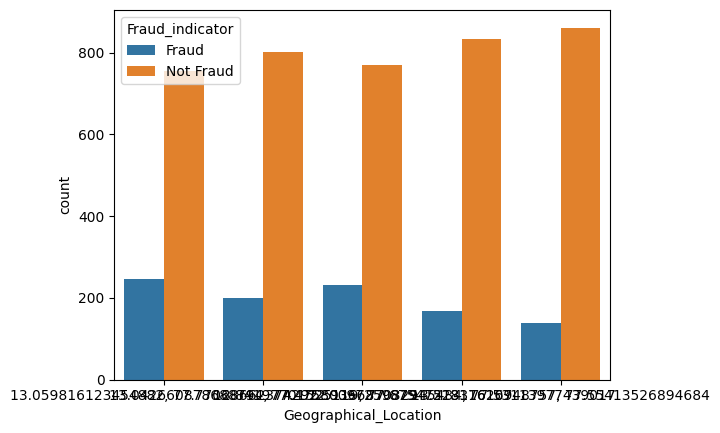

In [47]:
sns.countplot(data=cat_columns,x='Geographical_Location',hue='Fraud_indicator')

<Axes: xlabel='Transaction_Amount', ylabel='Count'>

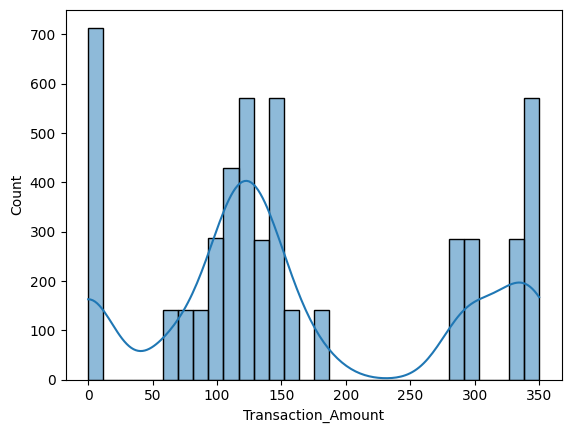

In [48]:
sns.histplot(data=num_columns,x='Transaction_Amount', kde=True, bins=30)

<Axes: xlabel='Amount_paid', ylabel='Count'>

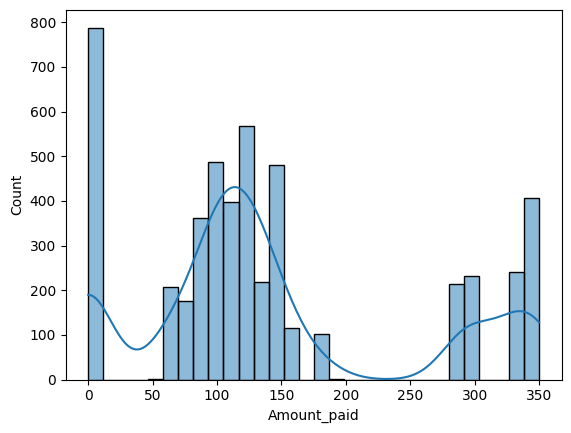

In [49]:
sns.histplot(data['Amount_paid'], kde=True, bins=30)

<Axes: xlabel='Vehicle_Speed', ylabel='Count'>

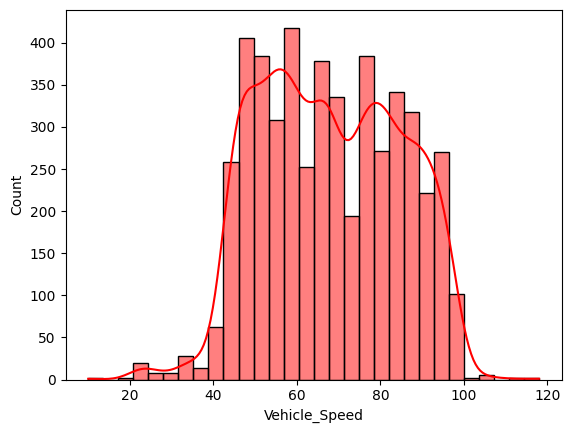

In [50]:
sns.histplot(data['Vehicle_Speed'], kde=True, bins=30, color='red')

relationship between transaction amount and paid amount

<Axes: xlabel='Transaction_Amount', ylabel='Amount_paid'>

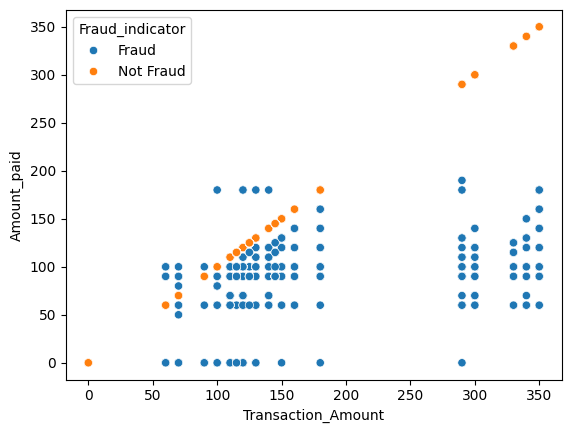

In [51]:
sns.scatterplot(x='Transaction_Amount',
                y='Amount_paid',
                hue='Fraud_indicator',
                data=data)

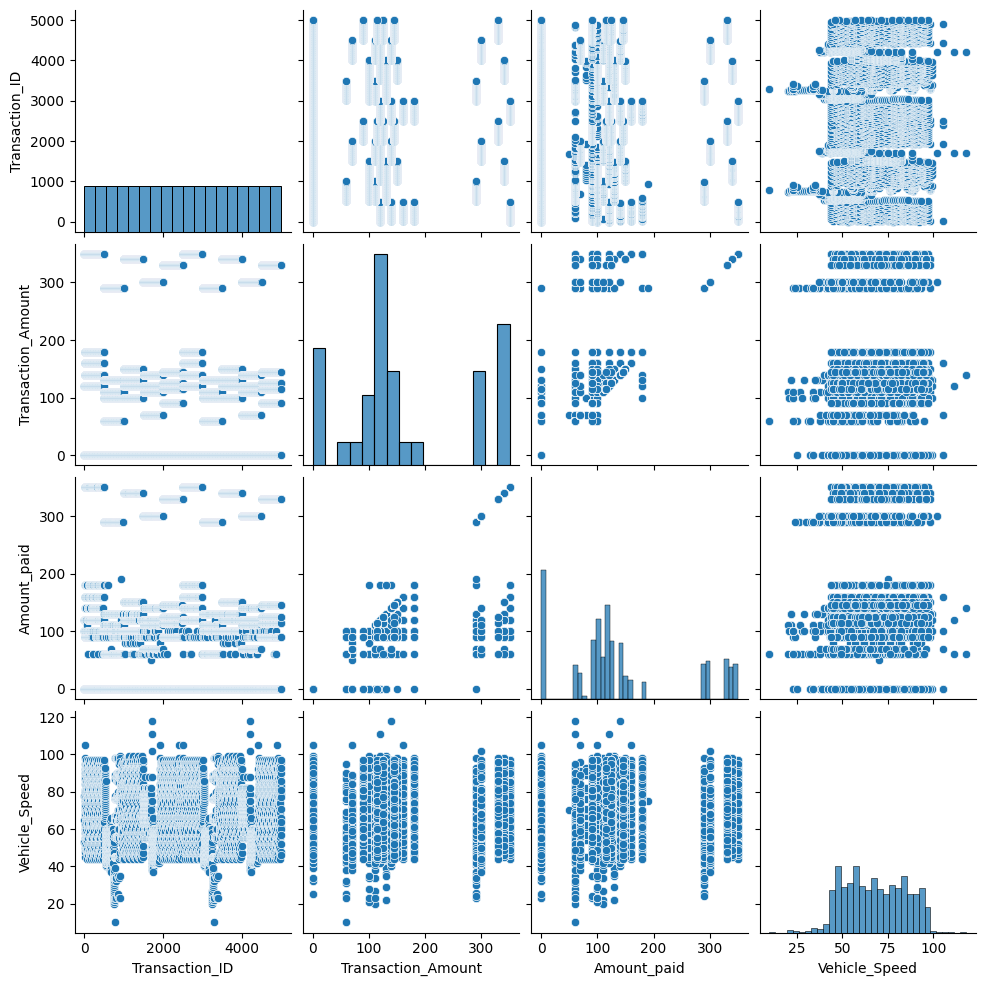

In [52]:
sns.pairplot(data)

Feature Extraction

In [53]:
data['FastagID'].mode()[0]

'FTG-000-QAZ-210'

In [54]:
data['state_code']=data['Vehicle_Plate_Number'].str[:2]

In [55]:
data.drop('Vehicle_Plate_Number',axis=1,inplace=True)

state_code
KA    2860
GA     489
MH     488
AP     447
TN     203
DL     123
KL     121
GJ     119
TS      22
UP      22
RJ      22
WB      21
MP      21
HR      21
BR      21
Name: count, dtype: int64


<Axes: ylabel='count'>

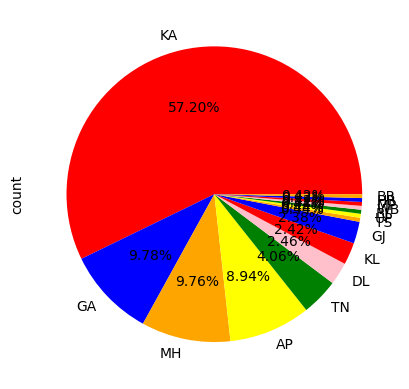

In [56]:
#visualise fraud based on state
print(data['state_code'].value_counts())
data['state_code'].value_counts().plot(kind='pie', labels=data['state_code'].value_counts().index,
                                                   autopct='%0.2f%%',
                                               colors=['red','blue','orange','yellow','green','pink'])

<Axes: xlabel='state_code', ylabel='state_code counts'>

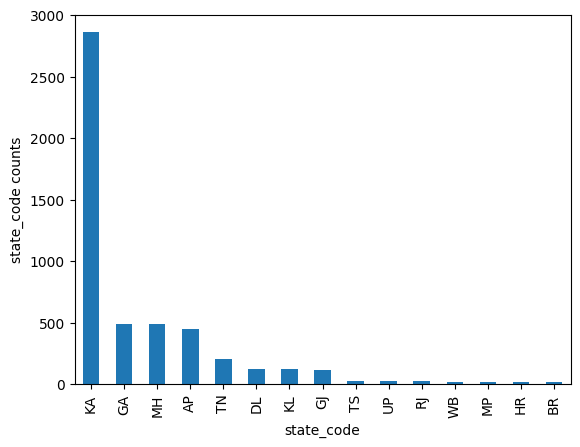

In [57]:
data['state_code'].value_counts().plot(kind='bar',
                                                   xlabel='state_code',
                                                   ylabel='state_code counts',
                                                   align='center')

<Axes: xlabel='state_code', ylabel='count'>

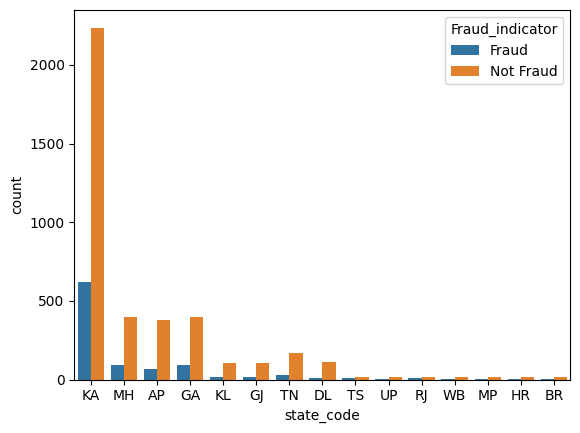

In [58]:
sns.countplot(data=data,x='state_code',hue='Fraud_indicator')

Observation

1. Highest fraud is happened in karnataka

In [59]:
# analyse timestamp to get fraud or not
data['Timestamp']=pd.to_datetime(data['Timestamp'])
data['Timestamp']

0      2023-01-06 11:20:00
1      2023-01-07 14:55:00
2      2023-01-08 18:25:00
3      2023-01-09 02:05:00
4      2023-01-10 06:35:00
               ...        
4995   2023-01-01 22:18:00
4996   2023-01-17 13:43:00
4997   2023-02-05 05:08:00
4998   2023-02-20 20:34:00
4999   2023-03-10 00:59:00
Name: Timestamp, Length: 5000, dtype: datetime64[ns]

In [60]:
data['hour']=data['Timestamp'].dt.hour
data['dayOfWeek']=data['Timestamp'].dt.dayofweek
data['month']=data['Timestamp'].dt.month
data['year']=data['Timestamp'].dt.year

In [61]:
data.drop('Timestamp',axis=1,inplace=True)

In [62]:
# visualise fraud based on days
print(data['dayOfWeek'].value_counts())
data['dayOfWeek'].values

dayOfWeek
6    743
1    728
0    716
4    713
5    709
2    697
3    694
Name: count, dtype: int64


array([4, 5, 6, ..., 6, 0, 4], dtype=int32)

<Axes: xlabel='dayOfWeek', ylabel='count'>

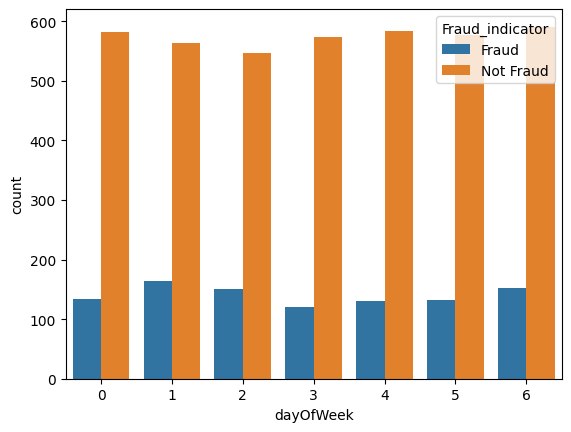

In [63]:
sns.countplot(data=data,x='dayOfWeek',hue='Fraud_indicator')

In [64]:
num_columns=data.select_dtypes(include=['int64','float64','int32'])
cat_columns=data.select_dtypes(include=['object'])

In [65]:
# correlation matrix
corr_matrix=num_columns.corr()

<Axes: >

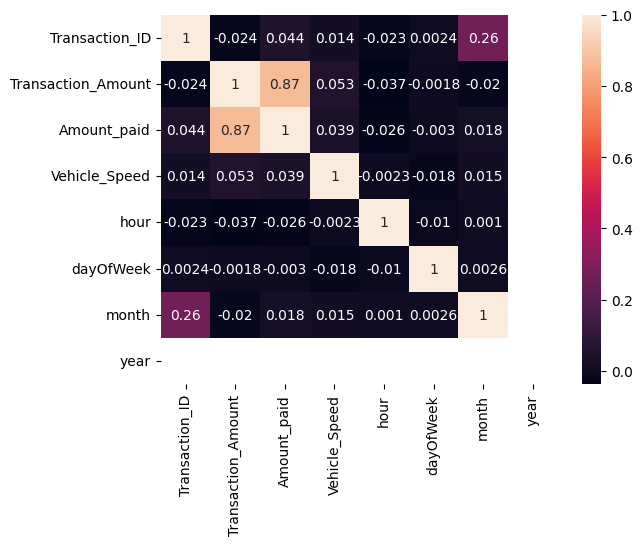

In [66]:
sns.heatmap(corr_matrix,annot=True)

In [67]:
# removing unncessesry columns
data.drop(['Transaction_ID','FastagID','Geographical_Location'], axis=1, inplace=True)

In [68]:
data.sample(4)

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,state_code,hour,dayOfWeek,month,year
3994,Truck,C-103,Express,Large,340,340,54,Not Fraud,MH,4,3,7,2023
3184,Sedan,A-101,Express,Medium,100,100,52,Not Fraud,KL,20,5,12,2023
1447,Sedan,A-101,Regular,Medium,120,120,93,Not Fraud,KA,8,0,5,2023
2489,Van,B-102,Regular,Medium,125,125,77,Not Fraud,KA,12,3,8,2023


Converting categoricaql columns into numerical

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [70]:
le.fit(data['Vehicle_Type'])
data['Vehicle_Type']=le.transform(data['Vehicle_Type'])

In [71]:
le.fit(data['Lane_Type'])
data['Lane_Type']=le.transform(data['Lane_Type'])

In [72]:
le.fit(data['Vehicle_Dimensions'])
data['Vehicle_Dimensions']=le.transform(data['Vehicle_Dimensions'])

In [73]:
le.fit(data['state_code'])
data['state_code']=le.transform(data['state_code'])

In [74]:
le.fit(data['Fraud_indicator'])
data['Fraud_indicator']=le.transform(data['Fraud_indicator'])

In [76]:
le.fit(data['TollBoothID'])
data['TollBoothID']=le.transform(data['TollBoothID'])

In [77]:
data.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,state_code,hour,dayOfWeek,month,year
0,0,0,0,0,350,120,65,0,6,11,4,1,2023
1,1,1,1,2,120,100,78,0,6,14,5,1,2023
2,2,3,1,2,0,0,53,1,6,18,6,1,2023
3,5,2,1,0,350,120,92,0,6,2,0,1,2023
4,6,1,0,1,140,100,60,0,6,6,1,1,2023


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Vehicle_Type        5000 non-null   int64
 1   TollBoothID         5000 non-null   int64
 2   Lane_Type           5000 non-null   int64
 3   Vehicle_Dimensions  5000 non-null   int64
 4   Transaction_Amount  5000 non-null   int64
 5   Amount_paid         5000 non-null   int64
 6   Vehicle_Speed       5000 non-null   int64
 7   Fraud_indicator     5000 non-null   int64
 8   state_code          5000 non-null   int64
 9   hour                5000 non-null   int32
 10  dayOfWeek           5000 non-null   int32
 11  month               5000 non-null   int32
 12  year                5000 non-null   int32
dtypes: int32(4), int64(9)
memory usage: 429.8 KB
